# TP1

## 1 Introduction à Python, Numpy et Scipy

#### 1)

In [1]:
import math

In [2]:
def power(n):
    
    return 2**int(math.ceil(math.log2(n)))

In [3]:
power(32)

32

#### 2)

In [4]:
import string

In [5]:
alphabet = string.ascii_lowercase

In [6]:
alphabet[2::3]

'cfilorux'

In [7]:
alphabet[-5::2]

'vxz'

In [8]:
alphabet[21::2]

'vxz'

#### 3)

In [9]:
print("{0:0.9f}".format(math.pi))

3.141592654


#### 4)

In [10]:
from collections import Counter

In [11]:
s = "Hello World!!"

In [12]:
ocurrences = dict(Counter(s))

In [13]:
print(ocurrences)

{'H': 1, 'e': 1, 'l': 3, 'o': 2, ' ': 1, 'W': 1, 'r': 1, 'd': 1, '!': 2}


#### 5)

In [14]:
import random

random.seed(0)
alphabet = string.ascii_lowercase
shuffled_alphabet = list(alphabet)
random.shuffle(shuffled_alphabet)  

def code_word(word):
    
    """ A function that takes a word as argument and returns a coded word """
    
    #using a dictionary to store the coding relations
    coding = dict(zip(alphabet,shuffled_alphabet))

    coded_word = ""
    
    for letter in word:
        coded_word += coding[letter.lower()]
    
    return coded_word

#### 6)

In [15]:
import time

In [16]:
#Version 1

t1 = time.time()

product = 2
for k in range(1,10000):
    product *= 4*(k**2)/(4*(k**2)-1)
    
t2 = time.time()
    
duration = t2 - t1
    
print("result: ", product)
print("time duration: ", duration)

result:  3.1415141108281714
time duration:  0.017480134963989258


In [17]:
#Version 2
import numpy as np

t3 = time.time()

k_list = list(range(1,10000))
log_sum = sum(map(lambda k: np.log(4*(k**2)/(4*(k**2)-1)),k_list))

product2 = 2*np.exp(log_sum)

t4 = time.time()

duration2 = t4 - t3

print("result: ", product2)
print("time duration: ", duration2)

result:  3.141514110828252
time duration:  0.021867752075195312


#### 7)

In [18]:
def quicksort(ll):
    """ a sorting algorithm with a pivot value"""
    if len(ll) <= 1:
        return ll
    else:
        pivot = ll.pop() # pivot = last element of the list ll.
        less = []
        greater = []
        for x in ll:
            if x <= pivot:
                less.append(x) # append 'x' to 'less'
            else:
                greater.append(x) # append 'x' to 'greater'
        return quicksort(less) + [pivot] + quicksort(greater) # concatenate quicksort(less), pivot and quicksort(greater)

In [19]:
quicksort([-2, 3, 5, 1, 3])

[-2, 1, 3, 3, 5]

#### 8)

In [20]:
M = 2*np.random.rand(5,6) - 1
print(M)

[[ 0.53535911 -0.0603824   0.98031931  0.1780518  -0.79213492 -0.92889657]
 [ 0.19380902 -0.66856036  0.39352984 -0.67779251 -0.01988039  0.45408694]
 [ 0.9405998  -0.18989051 -0.78465574  0.68777401  0.54615963 -0.10058265]
 [-0.62315745 -0.2863618   0.34866754  0.94979658 -0.58160912 -0.62931776]
 [-0.70381674 -0.86615774 -0.14450134 -0.76014278 -0.36278537  0.24630025]]


In [21]:
M[:,::2] = M[:,::2] - 2*M[:,1::2]

#### 9)

In [22]:
M = 2*np.random.rand(5,20) - 1

In [23]:
G = np.matmul(M,M.transpose())

In [24]:
#Test if G is symmetric
np.allclose(G,G.transpose())

True

In [25]:
#Test if eigenvalues of G are positive
np.all(np.linalg.eigvals(G) > 0)

True

In [26]:
#Rank of G
np.linalg.matrix_rank(G)

5

## 2 Introduction à Pandas, Matplotlib, etc.

#### 10)

In [27]:
import pandas as pd

In [28]:
df = pd.read_table("household_power_consumption.txt",sep=";",na_values=['?',' '])

In [29]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [30]:
#rows where there Nan values in one of both columns

sum(df['Sub_metering_1'].isna() | df['Global_active_power'].isna())

25979

#### 11)

In [31]:
df.dropna(inplace=True)

#### 12)

In [32]:
df['Sub_metering_1'] = 0.06*df['Sub_metering_1']

#### 13)

In [33]:
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)

In [34]:
data = df.set_index('Date')

In [35]:
data.head()

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,
2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


#### 14)

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("darkgrid")

In [37]:
davg = data.resample('D').mean()

In [38]:
davg.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,240.087028,9.999028,0.084708,2.907639,9.264583
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.044292,1.820139,9.734722
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.034958,5.279167,4.303472
2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972


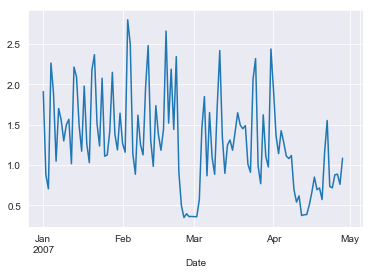

In [39]:
davg.loc["2007-01-01":"2007-04-30"]['Global_active_power'].plot()

#### 15)

In [40]:
temperatures = pd.read_table("TG_STAID011249.txt",sep=",",header=20)

In [41]:
temperatures.head()

,STAID,SOUID,DATE,TG,Q_TG
0,11249,71642,19210301,50,0
1,11249,71642,19210302,46,0
2,11249,71642,19210303,46,0
3,11249,71642,19210304,31,0
4,11249,71642,19210305,95,0


In [42]:
temperatures.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [43]:
temperatures.rename(columns={"    DATE":"Date","   TG":"TG"},inplace=True);

In [44]:
df_temp = temperatures[['Date',"TG"]]

In [45]:
# filling NaN to bad temperature values

df_temp[df_temp["TG"] < -273] = np.nan

/Users/andre.lmfarias/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/andre.lmfarias/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [46]:
df_temp["TG"] = df_temp["TG"]/10

/Users/andre.lmfarias/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
df_temp.dropna(inplace=True)

/Users/andre.lmfarias/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### 16)

In [48]:
df_temp['Date'] = pd.to_datetime(df_temp['Date'],format="%Y%m%d")

/Users/andre.lmfarias/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
data_temp = df_temp.set_index('Date')

In [50]:
data_temp.head()

,TG
Date,
1921-03-01,5.0
1921-03-02,4.6
1921-03-03,4.6
1921-03-04,3.1
1921-03-05,9.5


In [58]:
data1 = davg.loc["2007-01-01":"2007-04-30"]["Global_active_power"]

In [60]:
data2 = data_temp.loc["2007-01-01":"2007-04-30"]

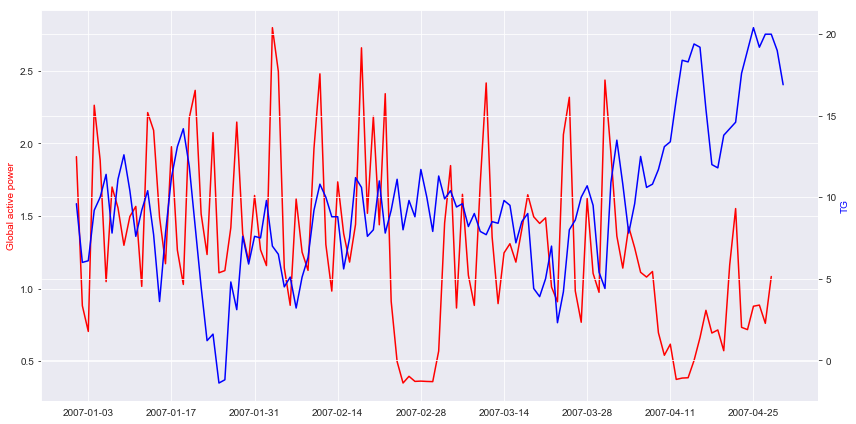

In [66]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_ylabel('Global active power', color="r")
ax1.plot(data1, color="r")

ax2 = ax1.twinx()

ax2.set_ylabel('TG', color="b") 
ax2.plot(data2, color="b")

fig.tight_layout()